
## Projeto | Construido uma rede com jogos da Steam 🎮️

    
---------------------

**Equipe**


 * Letícia Coêlho Barbosa       | [Github](https://github.com/leticiacb1)
 <br>

 * Lídia Alves Chagas Domingos  | [Github](https://github.com/LidiaDomingos)
 <br>

 * Lorran Caetano Lopes         | [Github](https://github.com/lorrancmlopes)
 <br>
 
 ---------------------

* **Dataset escolhido** : [Jogos da Steam](https://www.kaggle.com/datasets/fronkongames/steam-games-dataset)

### O DATASET

-------

O contexto do projeto engloba os jogos famosos para computadores disponíveis na Steam. Atualmente, a plataforma Steam possui aproximadamente 95 milhões de usuários no mundo todo e é sucesso entre os gamers, sendo a atual líder do mercado. 


#### Principais colunas
<br>

O dataset escolhido possui 39 colunas, nesse tópico citaremos a descrições de algumas colunas de maior interesse para analise.

* **name** : nome do jogo.
<br>

* **releaseDate** : data de lançamento.
<br>

* **price** : preço do jogo.
<br>

* **metacritic_score** : media das notas dadas por avaliações de profissionais.
<br>

* **user_score** : media das notas dadas pelos usuários do jogo.
<br>

* **score_rank** : o ranke do jogo baseado nas avaliações dos usuários.
<br>

* **developers** : desenvolvedores dos jogos.
<br>

* **categories** : categoria dos jogos.
<br>

* **genres** : genero do jogo.
<br>

* **tags** : Tags do jogo.
<br>

 
 ### NOSSA REDE

-------

* **Vértices** : Jogos da Steam.
<br>

* **Arestas**  : Existe uma aresta entre um jogo 1 e um jogo 2 se o número de tags em comum entre os jogos for superior ou igual a um **threadhold** (definido mais a frente)


 ### HIPOTESE

-------


`"Quanto mais central é a sua posição na rede, maior a média de avaliações dos críticos profissionais."`
<br>

* **Variável de controle**: Tamanho da empresa.
<br>

* **Variável dependente**:  medida indicativa de centralidade do nó na rede (coreness).
<br>

* **Variável independente**: dataset[Metacritic score]

### Analisando os dados 

-------

In [1]:
# ---------------------------------
# ------------ IMPORTS ------------
# ---------------------------------

import seaborn as sns
from netpixi.integration.gt import *
from regression.integration.gt import *
import netpixi
import pandas as pd

import numpy as np
import seaborn as sns
import regression as reg

from scipy import stats
from matplotlib import pyplot as plt

import cpnet
from graph_tool import spectral

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


In [2]:
# Grafo não direcional | Informação obtida via documentação
g = Graph(directed=False) 

In [3]:
# ----  Lendo o arquivo ----

df_principal = pd.read_csv('games.csv')

columns = [col for col in df_principal.columns]

print(f"\n> Colunas : {columns}\n")

print(f"\n> Tamanho do dataset : {df_principal.shape}\n")

print(f"\n> Primeiras linhas dataset : \n")
df_principal.head(2)


> Colunas : ['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU', 'Required age', 'Price', 'DLC count', 'About the game', 'Supported languages', 'Full audio languages', 'Reviews', 'Header image', 'Website', 'Support url', 'Support email', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score', 'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations', 'Notes', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies']


> Tamanho do dataset : (71716, 39)


> Primeiras linhas dataset : 



,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...




#### Descrevendo melhor a coluna Metacritic score

In [4]:
print(f"\n> Valores únicos presentes:\n\n {df_principal['Metacritic score'].unique()}\n")

print(f"\n> Distribuição dos valores :\n\n {df_principal['Metacritic score'].value_counts()}\n")

print(f"\n> Descrição:\n\n{df_principal['Metacritic score'].describe()}\n")


> Valores únicos presentes:

 [ 0 62 64 53 84 89 70 86 40 87 92 76 51 49 81 69 72 68 52 82 59 77 79 71
 74 73 88 47 75 66 50 63 67 80 58 90 39 78 55 85 65 91 83 57 56 44 60 61
 48 46 23 45 94 27 38 30 35 54 41 43 32 34 93 37 36 95 42 29 24 96 20 33
 97]


> Distribuição dos valores :

 0     67938
80      183
77      165
76      164
78      161
      ...  
23        1
27        1
24        1
20        1
33        1
Name: Metacritic score, Length: 73, dtype: int64


> Descrição:

count    71716.000000
mean         3.834207
std         16.437707
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         97.000000
Name: Metacritic score, dtype: float64



### Limpando Dataset

-------

In [5]:

# ---- Retirando alguns valores nulos ----

df_principal.dropna(subset=['Tags', 'Metacritic score'], inplace=True)
df_principal = df_principal[df_principal['Metacritic score'] != 0]


# ---- Amostragem para anos > 2019 e < 2023 ----

df_principal = df_principal[ df_principal["Release date"].map(lambda date: 
                                                              ((int(date.split(' ')[-1]) > 2019) and 
                                                               int(date.split(' ')[-1]) < 2023))== True]
df_principal.reset_index(inplace=True, drop=True)


# ---- 

print(f"\n> Tamanho do dataset pós limpeza:\n {df_principal.shape}\n")

print(f"\n> Descrição coluna Metacritic score:\n\n {df_principal['Metacritic score'].describe()}\n")


> Tamanho do dataset pós limpeza:
 (586, 39)


> Descrição coluna Metacritic score:

 count    586.000000
mean      75.583618
std        8.610509
min       39.000000
25%       71.000000
50%       77.000000
75%       81.000000
max       97.000000
Name: Metacritic score, dtype: float64



### Tags

-------

In [6]:

# ---- Tranforma a coluna de Tags em lista ----

df_principal['Tags'] = df_principal.Tags.apply(lambda x: str(x).split(','))
print(f"\n> dataset[Tags] como lista:\n\n{df_principal['Tags']}")



> dataset[Tags] como lista:

0      [Rhythm, VR, Multiplayer, Music, Racing, PvP, ...
1      [Sports, Racing, Simulation, Motocross, Motorb...
2      [Tactical, Turn-Based Strategy, Grand Strategy...
3      [Management, Simulation, Anime, Sexual Content...
4      [Action, Arcade, Shooter, Steampunk, Singlepla...
                             ...                        
581    [Strategy, Post-apocalyptic, Survival, Colony ...
582    [Atmospheric, Resource Management, Simulation,...
583    [Metroidvania, Female Protagonist, Shoot 'Em U...
584    [Colony Sim, Indie, Pixel Graphics, Simulation...
585    [Indie, Rhythm, Action, Hand-drawn, Colorful, ...
Name: Tags, Length: 586, dtype: object


### Montando os Nós da Rede

-------

In [7]:
id = 0
unique_name_values = df_principal['Name'].unique().tolist()
node_data = []

for _ , linha in  df_principal.iterrows():
    
    if(linha['Name'] in unique_name_values):
        node_data.append([id ,linha['Tags'], linha['Metacritic score']])
        id+=1

df_nodes = pd.DataFrame(node_data,columns=['id','Tags', 'Metacritic score']) 
df_nodes

,id,Tags,Metacritic score
0,0,"[Rhythm, VR, Multiplayer, Music, Racing, PvP, ...",87
1,1,"[Sports, Racing, Simulation, Motocross, Motorb...",72
2,2,"[Tactical, Turn-Based Strategy, Grand Strategy...",74
3,3,"[Management, Simulation, Anime, Sexual Content...",73
4,4,"[Action, Arcade, Shooter, Steampunk, Singlepla...",70
...,...,...,...
581,581,"[Strategy, Post-apocalyptic, Survival, Colony ...",76
582,582,"[Atmospheric, Resource Management, Simulation,...",78
583,583,"[Metroidvania, Female Protagonist, Shoot 'Em U...",82
584,584,"[Colony Sim, Indie, Pixel Graphics, Simulation...",93


In [8]:
# ---- Criando os nós e adiciona atributos aos nós ----

g.add_vp('Metacritic score')

aux = []
for _, infos in df_nodes.iterrows():
    
    #Adiciona vértices:
    infos = infos.astype(object)
    g.add_vertex(infos['id'])
    
    # Adiciona atributos:
    vertice = g.get_vertex(infos['id'])
    vertice['Metacritic score'] = infos['Metacritic score']

### Montando as Arestas da Rede

-------

In [9]:
def count_tags(lista_tags_1, lista_tags_2):
    '''
    Retorna o número de tags em comum entre duas listas
    '''    
    count_common_tags = 0
        
    for tag1 in lista_tags_1:
        for tag2 in lista_tags_2:
            
            if(tag1 == tag2):
                count_common_tags+=1
    
    return count_common_tags

In [10]:
node_relation = set()
data_relation = set()

for _, linha1 in df_nodes.iterrows():
    for _,linha2 in df_nodes.iterrows():
        
        proximidade = 0
        
        if(( (linha1['id'] , linha2['id']) not in node_relation) and 
           ( (linha2['id'] , linha1['id']) not in node_relation) and (linha2['id'] != linha1['id'])):
            
            # Calculando TAGS em comum
            proximidade = count_tags(linha1['Tags'], linha2['Tags'])
            
            # Adiciona valor na relação de nós:
            node_relation.add((linha1['id'] , linha2['id']))
        
            data_relation.add((linha1['id'], linha2['id'], proximidade))
            
df_relation = pd.DataFrame(data_relation,columns=['node_1', 'node_2' , 'Tags_em_Comum'] ) 
df_relation

,node_1,node_2,Tags_em_Comum
0,248,262,2
1,131,169,1
2,151,369,3
3,497,552,2
4,139,222,2
...,...,...,...
171400,84,86,8
171401,205,453,4
171402,205,494,5
171403,104,187,4


#### Threadhold para a construção das Arestas

<AxesSubplot: >

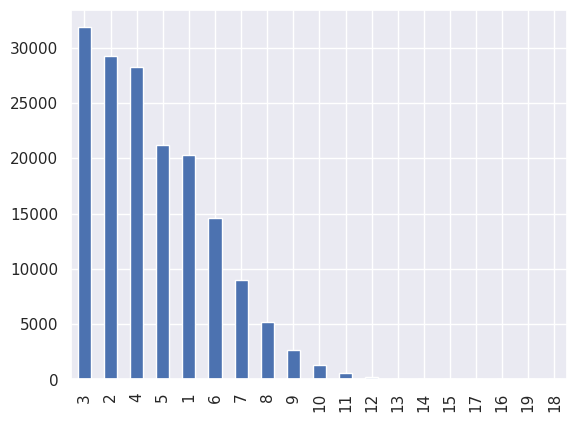

In [11]:
df_relation['Tags_em_Comum'][df_relation['Tags_em_Comum'] != 0].value_counts().plot(kind='bar')

In [12]:
# ---- Escolhendo threshold par aa criação das arestas a depender da distribuição ----

threshold_proximidade = 5

In [13]:
# ---- Criando arestas ----

for _ , relacao in df_relation.iterrows():
    
    if(relacao['Tags_em_Comum'] > threshold_proximidade):
        g.add_edge(relacao['node_1'], relacao['node_2'])

### Métricas da Rede

-------

In [14]:
# ---- Número de arestas, nós e densidade ----

n = g.num_vertices()
m = g.num_edges()

if g.is_directed():
    max_edges = n * (n - 1)
else:
    max_edges = n * (n - 1) // 2
d = m / max_edges

print('\n > Número de vértices de g:', n )
print('\n > Número de arestas de g:', m)
print('\n > Densidade:', d)


 > Número de vértices de g: 586

 > Número de arestas de g: 33821

 > Densidade: 0.1973162976575946


### Calculando Degree

-------

In [15]:
# Propriedade dos vértices
data = gt_data(g)

# Calculando degrees
in_degrees = []
out_degrees = []
degrees = []

for v in g.all_vertices():
    in_degrees.append(v.in_degree())
for v in g.all_vertices():
    out_degrees.append(v.out_degree())
for v in g.all_vertices():
    degrees.append(v.total_degree())
    
data['in_degree'] = in_degrees
data['out_degree'] = out_degrees
data['degree'] = degrees
data['degree'].describe()

count    586.000000
mean     115.430034
std       69.678746
min        0.000000
25%       57.000000
50%      104.500000
75%      169.000000
max      302.000000
Name: degree, dtype: float64

<AxesSubplot: xlabel='degree', ylabel='Count'>

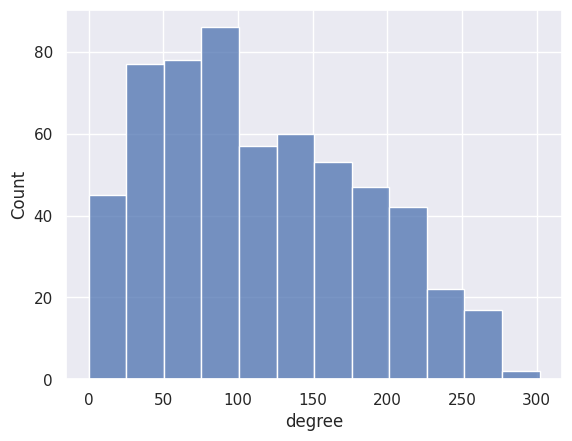

In [16]:
sns.histplot(data['degree'])

### Grafo

-------

In [17]:
# ----- Salva e renderiza grafo -----
gt_save(g, 'projeto.net.gz')

r = netpixi.render('/projeto.net.gz')

In [18]:
# ----- Algoritmo Reingold Fruchterm -----
m = gt_draw.fruchterman_reingold_layout(g)
gt_move(g, m)
gt_save(g, 'projeto_frunch.net.gz')
r = netpixi.render('projeto_frunch.net.gz');

In [ ]:
lista_int_coreness = []
lista_float_coreness = []

# Adiciona propriedades ao nó
g.add_vp('core')
g.add_vp('coreness')

# ---- Funções ----

def surprise():
    matrix = spectral.adjacency(g)
    algorithm = cpnet.Surprise()
    algorithm.detect(matrix)
    return algorithm.get_coreness()

def rombach(matrix):
    matrix = spectral.adjacency(g)
    algorithm = cpnet.Rombach()
    algorithm.detect(matrix)
    return algorithm.get_coreness()

# ---- Roda Algorítimo ----
c_core = surprise()
c_coreness = rombach()


for i, coreness in c_core.items():
    v = g.get_vertex_by_index(i)
    v['core'] = int(coreness)
    lista_int_coreness.append(int(coreness))
df_nodes['core'] = lista_int_coreness

for i, coreness in c_coreness.items():
    v = g.get_vertex_by_index(i)
    v['coreness'] = float(coreness)
    lista_float_coreness.append(float(coreness))
df_nodes['coreness'] = lista_float_coreness


# ---- Modifica cor ----
for v in g.all_vertices():
    if v['core'] == 1:
        r.vertex(v['id'], color=0xff0000)
    else:
        r.vertex(v['id'], color=0x00ff00)
        
# ---- Modifica tamanho ----

for v in g.all_vertices():
    r.vertex(v['id'], size=(10 + 40 * v['coreness']))
    r.vertex(v['Metacritic score'], color=0xff0000)    

### Regressão Linear

-------

In [ ]:
sns.scatterplot(x=df_nodes['coreness'], y=df_nodes['Metacritic score']);

In [ ]:
sns.regplot(x=df_nodes['coreness'], y=df_nodes['Metacritic score']);

In [ ]:
result = reg.linear(data=df_nodes, formula='"Metacritic score" ~ coreness')
result.summary()

In [ ]:
result.micro_summary()

In [ ]:
result.plot_residuals()

In [ ]:
# Observa-se um treshold de divisão no coreness, dessa forma, podemos dividir esses dados em dois conjuntos
# E assim aplicar uma regressão em cada metade.

threshold_coreness = 0.5

df_nodes_menor = df_nodes[df_nodes['coreness'] < threshold_coreness]
df_nodes_maior =  df_nodes[df_nodes['coreness'] > threshold_coreness]

In [ ]:
df_nodes_menor.head()
df_nodes_maior.head()

In [ ]:
# ------- Para a primeira metade  -------

sns.regplot(x=df_nodes_menor['coreness'], y=df_nodes_menor['Metacritic score']);

In [ ]:
result_menor = reg.linear(data=df_nodes_menor, formula='"Metacritic score" ~ coreness')

In [ ]:
result_menor.micro_summary()

In [ ]:
result_menor.plot_residuals()

In [ ]:
# ------- Para a segunda metade  -------

sns.regplot(x=df_nodes_maior['coreness'], y=df_nodes_maior['Metacritic score']);

In [ ]:
result_maior = reg.linear(data=df_nodes_maior, formula='"Metacritic score" ~ coreness')

In [ ]:
result_maior.micro_summary()

In [ ]:
result_menor.plot_residuals()